# Assignment 1

### CS2545 - Data Science ###
### Winter, 2023 ###
### UNB, Fredericton ###

Please complete the following and submit this notebook (filename: Assignment1-**lastname**-**firstname**.ipynb) on D2L by **Monday, March 20th, 11:59 PM**.
</br>
</br>
**NOTE:**
</br>
**Late submissions will be accepted until Tuesday, March 21st, 11:59 PM**
</br>
**Late submissions will be evaluated with a PENALTY of 10%**
</br>
</br>

**Q1** Download the *countries.csv* and *world_gdp_2019.csv* files from D2L in the current folder. Load them into two dataframes *country* and *gdp*. Show top 5 countries in terms of gdp (based on column 'GDP_US$' in *gdp*). **(2 points)**

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Load countries.csv
u_cols = ['country', 'population', 'area', 'currency']
country = pd.read_csv('countries.csv', sep=';', names=u_cols)
print(country)

u_cols1 = ['country', 'code', 'gdp']
gdp = pd.read_csv('world_gdp_2019.csv', sep=';', names=u_cols1, skiprows=[0])

gdpCopy= gdp
gdpCopy2= gdp

#for i in range(5):
#c= gdp['gdp'].astype(float).min()
print("Maximum GDPs:")
for i in range(5):
    c= gdpCopy['gdp'].astype(float).idxmax()
    print(gdpCopy.iloc[c])
    gdpCopy.drop(c, inplace=True)




                      country  population     area  currency
0                     Country  Population     Area  Currency
1                 Afghanistan    32564342   652230   Afghani
2                       Egypt    88487396  1001450     Pfund
3                     Albania     3029278    28748       Lek
4                     Algeria    39542166  2381741     Dinar
..                        ...         ...      ...       ...
242         Wallis and Futuna       15613      142     Franc
243          Christmas Island        1530      135    Dollar
244            Western Sahara      570866   266000    Dirham
245  Central African Republic     5391539   622984     Franc
246                    Cyprus     1189197     9251      Euro

[247 rows x 4 columns]
Maximum GDPs:
country          World
code               WLD
gdp        8.76078e+13
Name: 211, dtype: object
country    United States
code                 USA
gdp          2.14332e+13
Name: 203, dtype: object
country    European Union
code      

**Q1.1** Using the dataframes created in Q1.0, answer the following. **(1+1 = 2 points)**

* A. Create a dataframe *country_gdp* that shows the countries and their GDPs by **joining** the two dataframes above. 
Note that you need to show all the countries in *country* dataframe even if there is no information in *gdp* dataframe.

* B. Remove the rows where the *GDP_US$* columns shows a *NaN* value. 

In [152]:
# Q1.1 A

joinedDf= pd.merge(country,gdp,how='left')
print(joinedDf)



                      country  population     area  currency code  \
0                     Country  Population     Area  Currency  NaN   
1                 Afghanistan    32564342   652230   Afghani  AFG   
2                       Egypt    88487396  1001450     Pfund  EGY   
3                     Albania     3029278    28748       Lek  ALB   
4                     Algeria    39542166  2381741     Dinar  DZA   
..                        ...         ...      ...       ...  ...   
242         Wallis and Futuna       15613      142     Franc  NaN   
243          Christmas Island        1530      135    Dollar  NaN   
244            Western Sahara      570866   266000    Dirham  NaN   
245  Central African Republic     5391539   622984     Franc  CAF   
246                    Cyprus     1189197     9251      Euro  CYP   

              gdp  
0             NaN  
1    1.929110e+10  
2    3.030810e+11  
3    1.528661e+10  
4    1.711580e+11  
..            ...  
242           NaN  
243        

In [317]:
# Q1.1 B
import numpy as np
joinedDf= pd.merge(country,gdp,how='outer')
 

joinedDf.dropna(subset=['gdp'],inplace=True)
print(joinedDf)

       
        





                            country population     area currency code  \
1                       Afghanistan   32564342   652230  Afghani  AFG   
2                             Egypt   88487396  1001450    Pfund  EGY   
3                           Albania    3029278    28748      Lek  ALB   
4                           Algeria   39542166  2381741    Dinar  DZA   
5                    American Samoa      54343      199   Dollar  ASM   
..                              ...        ...      ...      ...  ...   
264                 North Macedonia        NaN      NaN      NaN  MKD   
265                         Myanmar        NaN      NaN      NaN  MMR   
267                      South Asia        NaN      NaN      NaN  SAS   
268                 Slovak Republic        NaN      NaN      NaN  SVK   
270  St. Vincent and the Grenadines        NaN      NaN      NaN  VCT   

              gdp  
1    1.929110e+10  
2    3.030810e+11  
3    1.528661e+10  
4    1.711580e+11  
5    6.380000e+08  
.. 

**Q2.1** Add a column **IncomeGroup** to the dataframe **country_gdp** based on the GDP of the country and GDP ranges and the corresponding income group labels below. **(2 points)**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-1wig" colspan="2"> GDP range</th>
    <th class="tg-0lax" rowspan="2">Income group</th>
  </tr>
  <tr>
    <td class="tg-1wig">Min GDP</td>
    <td class="tg-1wig">Max GDP</td>
  </tr>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">500000000</td>
    <td class="tg-0lax">low</td>
  </tr>
  <tr>
    <td class="tg-0lax">500000000</td>
    <td class="tg-0lax">5000000000</td>
    <td class="tg-0lax">lower middle</td>
  </tr>
  <tr>
    <td class="tg-0lax">5000000000</td>
    <td class="tg-0lax">50000000000</td>
    <td class="tg-0lax">middle</td>
  </tr>
  <tr>
    <td class="tg-0lax">50000000000</td>
    <td class="tg-0lax">500000000000</td>
    <td class="tg-0lax">upper middle</td>
  </tr>
  <tr>
    <td class="tg-0lax">500000000000</td>
    <td class="tg-0lax">50000000000000</td>
    <td class="tg-0lax">high</td>
  </tr>
</table>

In [318]:
# Q2.1

joinedDf.dropna(subset=['gdp'],inplace=True)
joinedDf["Income Group"]=1
incomeGroup=[]

for i in range(len(joinedDf)):
    num= float(joinedDf.iloc[i,5])
    
    
    if num>0 and num< 5e+8:
        print(num)
        #joinedDf.loc[i+1,"Income Group"]="low"
        incomeGroup.append("low")
    elif num>5e+8 and num<5e+9:
        print(num)
        #joinedDf.loc[i+1,"Income Group"]="lower middle"
        incomeGroup.append("lower middle")
    elif num>5e+9 and num<5e+10:
        print(num)
        #joinedDf.loc[i+1,"Income Group"]="middle"
        incomeGroup.append("middle")
        print("yo middle")
    elif num>5e+10 and num<5e+11:
        print(num)
        #joinedDf.loc[i+1,"Income Group"]="upper middle"
        incomeGroup.append("upper middle")
        print("yo upper")
    elif num>5e+11 and num<5e+13:
        print(num)
        incomeGroup.append("high")
        #joinedDf.loc[i+1,"Income Group"]="high"
        
    #else:
        #joinedDf.loc[i,6]="out"
joinedDf["Income Group"]=incomeGroup
joinedDf.dropna(thresh=4,inplace=True)        
print(joinedDf)  
    

    

19291104008.0
yo middle
303081000000.0
yo upper
15286612573.0
yo middle
171158000000.0
yo upper
638000000.0
3155065488.0
89417190341.0
yo upper
1661962963.0
11417278045.0
yo middle
445445000000.0
yo upper
13672802158.0
yo middle
48174235294.0
yo middle
95912590628.0
yo upper
1396570000000.0
13578800000.0
yo middle
38474521277.0
yo middle
302563000000.0
yo upper
5209000000.0
yo middle
64409647194.0
yo upper
533255000000.0
1982518541.0
14391686309.0
yo middle
7484113000.0
yo middle
2530547158.0
40895322851.0
yo middle
20202479538.0
yo middle
18362348888.0
yo middle
1877810000000.0
68558815112.0
yo upper
15990803570.0
yo middle
3012308946.0
279385000000.0
yo upper
63951114302.0
yo upper
3101787709.0
350104000000.0
yo upper
50400746171.0
yo upper
3861120000000.0
574607407.4
88941299734.0
yo upper
3324634256.0
108108000000.0
yo upper
26896660000.0
yo middle
31471100656.0
yo middle
3126293220.0
5496250694.0
yo middle
268966000000.0
yo upper
2715520000000.0
16874450215.0
yo middle
17477255562

**Q2.2**  Using the dataframe from above, group the countries by *IncomeGroup* column and show the average GDP for each income group. **(2 points)**

In [320]:
# Q2.2

joinedDf.sort_values(by='Income Group',inplace=True)
#joinedDf.iloc[:50]#to show sorted

joinedDf

,country,population,area,currency,code,gdp,Income Group
188,Switzerland,8121830,41277,Franken,CHE,7.314740e+11,high
187,Sweden,9801616,450295,Krone,SWE,5.312830e+11,high
80,India,1251695584,3287263,Rupie,IND,2.870500e+12,high
179,Russia,142423773,17098242,Rubel,RUS,1.687450e+12,high
173,Poland,38562189,312685,Zloty,POL,5.958620e+11,high
...,...,...,...,...,...,...,...
160,Norway,5207689,323802,Krone,NOR,4.055100e+11,upper middle
46,Dominican Republic,10478756,48670,Peso,DOM,8.894130e+10,upper middle
155,Nigeria,181562056,923768,Naira,NGA,4.481200e+11,upper middle
48,Ecuador,15868396,283561,Dollar,ECU,1.081080e+11,upper middle


**Q2.3**  Using the dataframe from Q2.1, group the countries by *IncomeGroup* column and plot a bar chart for the median GDP (GDP_US$) for each income group. The y-axis should be in log scale. **(2 points)**

[215897372.16666666, 2034155010.090909, 18895969343.27941, 187549373852.4394, 1696931760000.0]


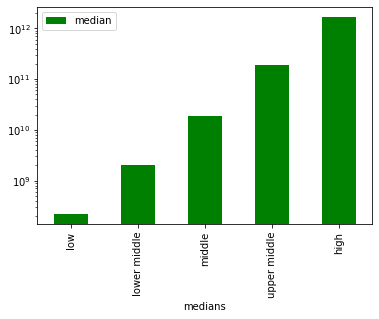

In [343]:
# Q2.3
import matplotlib.pyplot as plt

medians=[]
lowerMiddleM=0
lowerMiddleInc=0

lowM=0
lowInc=0

highM=0
highInc=0

upperMiddleM=0
upperMiddleInc=0

middleM=0
middleInc=0

joinedDf.sort_values(by='Income Group',inplace=True)
joinedDf.iloc[:50]#to show sorted


for i in range(len(joinedDf)):
    val= joinedDf.iloc[i,6]
    
    if val=="lower middle":
        lowerMiddleInc=lowerMiddleInc+1
        lowerMiddleM+=int(joinedDf.iloc[i,5])
    
    elif val=="middle":
        middleInc=middleInc+1
        middleM+=int(joinedDf.iloc[i,5])
        
    elif val=="upper middle":
        upperMiddleInc=upperMiddleInc+1
        upperMiddleM+=int(joinedDf.iloc[i,5])
        
    elif val=="low":
        lowInc=lowInc+1
        lowM+=int(joinedDf.iloc[i,5])
        
    elif val=="high":
        highInc=highInc+1
        highM+=int(joinedDf.iloc[i,5])
        
        
        
medians.append(lowM/lowInc)
medians.append(lowerMiddleM/lowerMiddleInc)
medians.append(middleM/middleInc)
medians.append(upperMiddleM/upperMiddleInc)
medians.append(highM/highInc)

print(medians)

#plt.bar(medians, logy=True)
data = {'medians':['low','lower middle','middle','upper middle','high'],
'median' :medians}
df = pd.DataFrame(data)
df.plot(kind='bar', x='medians', color='green',logy=True)

#plt.show()

**Q3** Download the *capitals.csv*  and *major_cities.csv* files from D2L in the current folder. Load them into two dataframes **capital** and **major_cities**, and then show first 5 rows. The major cities are some of the cities with relatively large population. The capitals are capitals of the countries. **(2 points)**


In [351]:
# Load capitals.csv

u_cols = ['CapitalCity','Country','CountryCode','Latitude','Longitude']
major = pd.read_csv('capitals.csv', sep=',', names=u_cols,skiprows=[0])
print(capitals.iloc[:5])

   CapitalCity           Country CountryCode   Latitude   Longitude
0        Abuja           Nigeria          NG   9.057850    7.495080
1        Accra             Ghana          GH   5.556020   -0.196900
2    Adamstown  Pitcairn Islands          PN -25.066397 -130.100197
3  Addis Ababa          Ethiopia          ET   9.024970   38.746890
4      Algiers           Algeria          DZ  36.752500    3.041970


In [356]:
# Load major_cities.csv

u_cols = ['City','Country','CityPopulation']
major = pd.read_csv('major_cities.csv', sep=',', names=u_cols,skiprows=[0])
print(major.iloc[:5])

       City   Country  CityPopulation
0  Shanghai     China        22315500
1   Karachi  Pakistan        13052000
2    Mumbai     India        12691800
3   Beijing     China        11716600
4  Istanbul    Turkey        11174300


**Q3.1** For each country that has a Megacity (i.e. city with population more than 10 million), show the name of country and the number of Megacities it has. **(1 point)**

**Note: Countries should be sorted in descending order based on the number of megacities they have.**

In [368]:
# Q3.1

major.sort_values(by='CityPopulation',ascending=False, inplace=True)
print(major)
cntryList=[]

for i in range(len(major)):
    if major.iloc[i,2]>10000000:
        cntry= major.iloc[i,1]
        if cntry in cntryList:
            index1=cntryList.index(cntry)
            cntryList[index1+1]=int(cntryList[index1+1])+1
        else:
            cntryList.append(cntry)
            cntryList.append(str(1))
    
for i in range(int(len(cntryList)/2)):
    print(cntryList[i])

            City   Country  CityPopulation
0       Shanghai     China        22315500
1        Karachi  Pakistan        13052000
2         Mumbai     India        12691800
3        Beijing     China        11716600
4       Istanbul    Turkey        11174300
..           ...       ...             ...
347   Aurangabad     India         1016400
348    Volgograd    Russia         1011400
349  Nova Iguaçu    Brazil         1002100
350      Jieyang     China         1002000
351       Odessa   Ukraine         1001600

[352 rows x 3 columns]
China
4
Pakistan
1
India
2
Turkey
1


**Q4** For the questions Q4.1 and Q4.3, you will plot data on a map. If you have installed an Anaconda Python distribution in your local machine, you have to install **basemap** and **plotly** packages. If you are using FCS lab VM, then they are already installed in the VMs.


**Q4.1** From question Q3.0 (for the dataframe **major_cities**), plot the name of the top 10 cities (i.e. by population) in a map of the world. Use the Basemap module for this. For more help, visit https://matplotlib.org/basemap/. **(3 points)**

In [374]:
import numpy as np
import matplotlib.pyplot as plt
# use the following module 
#from mpl_toolkits.basemap import Basemap
import Basemap from mpl_toolkits.basemap

# Write your code here
m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')


LAlat, LAlon = 9.05785,7.49508
xpt, ypt = m(LAlon, LAlat)
m.plot(xpt, ypt, 'g^', markersize=15)



SyntaxError: invalid syntax (<ipython-input-374-be042c7d2cb2>, line 5)

**Q4.2** Add a column **gdp_per_capita** to the dataframe **country_gdp** in Q2.1. This will be a calculated column based on the GDP per capita of each country. **(1 point)**

In [27]:
# Q4.2



**Q4.3** Using the above dataframe (which will include *gdp_per_capita*), create a choropleth map of the world based on the GDP per capita of each country. Use the plotly module for this. For more help, visit https://plotly.com/python/choropleth-maps/. **(3 points)**


In [28]:
import plotly.graph_objects as go
import pandas as pd

# Write your code here

